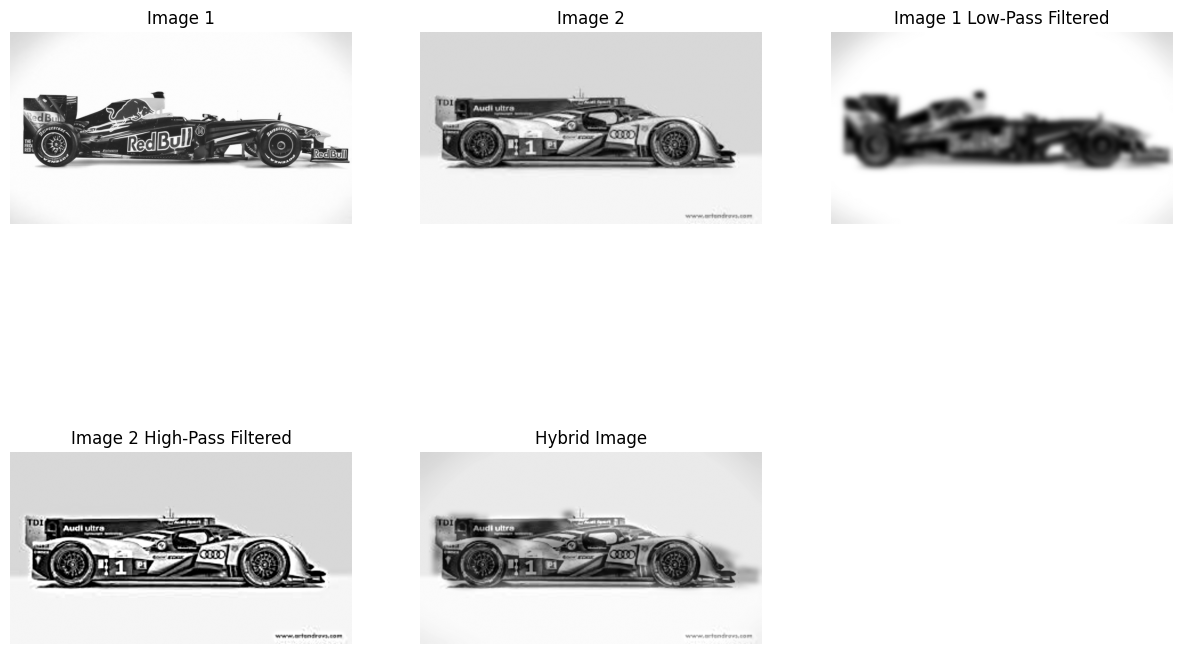

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def low_pass_filter(image, cutoff_frequency):
    return cv2.GaussianBlur(image, (cutoff_frequency, cutoff_frequency), 0)

def high_pass_filter(image, cutoff_frequency):
    low_pass = low_pass_filter(image, cutoff_frequency)
    return cv2.addWeighted(image, 2, low_pass, -1, 0)

def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name,cmap='grey')
    plt.title(Title)
    plt.axis("off")

image1 = cv2.imread('image1.png')
image2 = cv2.resize(cv2.imread('image2.png'),(image1.shape[1],image1.shape[0]))
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image1_low_pass = low_pass_filter(image1_rgb, 35)
image2_high_pass = high_pass_filter(image2_rgb, 35)

hybrid_image = cv2.addWeighted(image1_low_pass, 0.5, image2_high_pass, 0.5, 0)

plt.figure(figsize=(15, 10))
show(image1_rgb, 2, 3, 1, "Image 1")
show(image2_rgb, 2, 3, 2, "Image 2")
show(image1_low_pass, 2, 3, 3, "Image 1 Low-Pass Filtered")
show(image2_high_pass, 2, 3, 4, "Image 2 High-Pass Filtered")
show(hybrid_image, 2, 3, 5, "Hybrid Image")
plt.show()